In [1318]:
## import libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn import metrics   ## We use metrics for control accuarcy in regression

from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.model_selection import RepeatedKFold
from sklearn.linear_model import RidgeCV

In [1319]:
## Load the dataset
data = pd.read_csv('M1_final.csv')
data.head()

,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,OP_UNIQUE_CARRIER,TAIL_NUM,DEST,DEP_DELAY,CRS_ELAPSED_TIME,DISTANCE,CRS_DEP_M,...,Dew Point,Humidity,Wind,Wind Speed,Wind Gust,Pressure,Condition,sch_dep,sch_arr,TAXI_OUT
0,11,1,5,B6,N828JB,CHS,-1,124,636,324,...,34,58,W,25,38,29.86,Fair / Windy,9,17,14
1,11,1,5,B6,N992JB,LAX,-7,371,2475,340,...,34,58,W,25,38,29.86,Fair / Windy,9,17,15
2,11,1,5,B6,N959JB,FLL,40,181,1069,301,...,34,58,W,25,38,29.86,Fair / Windy,9,17,22
3,11,1,5,B6,N999JQ,MCO,-2,168,944,345,...,34,58,W,25,38,29.86,Fair / Windy,9,17,12
4,11,1,5,DL,N880DN,ATL,-4,139,760,360,...,32,58,W,24,35,29.91,Fair / Windy,9,17,13


In [1320]:
# Rename column names
column_names = {"OP_UNIQUE_CARRIER":"CARRIER_CODE",
                "TAIL_NUM":"FLIGHT_NO",
                "CRS_ELAPSED_TIME":"SCHEDULED_DURATION",
                "CRS_DEP_M":"SCHEDULED_DEPARTURE",
                "DEP_TIME_M":"ACTUAL_DEP_TIME",
                "CRS_ARR_M":"SCHEDULED_ARRIVAL",
                "sch_dep":"FLT_SCH_ARRIVAL",
                "sch_arr":"FLT_SCH_DEPARTURE"
               }

data = data.rename(column_names, axis=1)
data.head()

,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,CARRIER_CODE,FLIGHT_NO,DEST,DEP_DELAY,SCHEDULED_DURATION,DISTANCE,SCHEDULED_DEPARTURE,...,Dew Point,Humidity,Wind,Wind Speed,Wind Gust,Pressure,Condition,FLT_SCH_ARRIVAL,FLT_SCH_DEPARTURE,TAXI_OUT
0,11,1,5,B6,N828JB,CHS,-1,124,636,324,...,34,58,W,25,38,29.86,Fair / Windy,9,17,14
1,11,1,5,B6,N992JB,LAX,-7,371,2475,340,...,34,58,W,25,38,29.86,Fair / Windy,9,17,15
2,11,1,5,B6,N959JB,FLL,40,181,1069,301,...,34,58,W,25,38,29.86,Fair / Windy,9,17,22
3,11,1,5,B6,N999JQ,MCO,-2,168,944,345,...,34,58,W,25,38,29.86,Fair / Windy,9,17,12
4,11,1,5,DL,N880DN,ATL,-4,139,760,360,...,32,58,W,24,35,29.91,Fair / Windy,9,17,13


In [1321]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28820 entries, 0 to 28819
Data columns (total 23 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   MONTH                28820 non-null  int64  
 1   DAY_OF_MONTH         28820 non-null  int64  
 2   DAY_OF_WEEK          28820 non-null  int64  
 3   CARRIER_CODE         28820 non-null  object 
 4   FLIGHT_NO            28820 non-null  object 
 5   DEST                 28820 non-null  object 
 6   DEP_DELAY            28820 non-null  int64  
 7   SCHEDULED_DURATION   28820 non-null  int64  
 8   DISTANCE             28820 non-null  int64  
 9   SCHEDULED_DEPARTURE  28820 non-null  int64  
 10  ACTUAL_DEP_TIME      28820 non-null  int64  
 11  SCHEDULED_ARRIVAL    28820 non-null  int64  
 12  Temperature          28820 non-null  int64  
 13  Dew Point            28820 non-null  object 
 14  Humidity             28820 non-null  int64  
 15  Wind                 28818 non-null 

In [1322]:
## Converting Dew Point which is an object dtype to an integer.
data['Dew Point'].astype(str).astype(int)

0        34
1        34
2        34
3        34
4        32
         ..
28815    38
28816    38
28817    38
28818    38
28819    38
Name: Dew Point, Length: 28820, dtype: int64

In [1323]:
## Checking data for null values
data.isnull().sum()

MONTH                  0
DAY_OF_MONTH           0
DAY_OF_WEEK            0
CARRIER_CODE           0
FLIGHT_NO              0
DEST                   0
DEP_DELAY              0
SCHEDULED_DURATION     0
DISTANCE               0
SCHEDULED_DEPARTURE    0
ACTUAL_DEP_TIME        0
SCHEDULED_ARRIVAL      0
Temperature            0
Dew Point              0
Humidity               0
Wind                   2
Wind Speed             0
Wind Gust              0
Pressure               0
Condition              0
FLT_SCH_ARRIVAL        0
FLT_SCH_DEPARTURE      0
TAXI_OUT               0
dtype: int64

In [1324]:
## dropna deletes null rows
data.dropna(inplace=True)

In [1325]:
## Replacing for easy count (Delay=1, Early & On Time = 0)
data["DEP_DELAY"] = np.where(data["DEP_DELAY"] > 0, 1, 0)

In [1326]:
data.head()

,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,CARRIER_CODE,FLIGHT_NO,DEST,DEP_DELAY,SCHEDULED_DURATION,DISTANCE,SCHEDULED_DEPARTURE,...,Dew Point,Humidity,Wind,Wind Speed,Wind Gust,Pressure,Condition,FLT_SCH_ARRIVAL,FLT_SCH_DEPARTURE,TAXI_OUT
0,11,1,5,B6,N828JB,CHS,0,124,636,324,...,34,58,W,25,38,29.86,Fair / Windy,9,17,14
1,11,1,5,B6,N992JB,LAX,0,371,2475,340,...,34,58,W,25,38,29.86,Fair / Windy,9,17,15
2,11,1,5,B6,N959JB,FLL,1,181,1069,301,...,34,58,W,25,38,29.86,Fair / Windy,9,17,22
3,11,1,5,B6,N999JQ,MCO,0,168,944,345,...,34,58,W,25,38,29.86,Fair / Windy,9,17,12
4,11,1,5,DL,N880DN,ATL,0,139,760,360,...,32,58,W,24,35,29.91,Fair / Windy,9,17,13


In [1327]:
## Check for correlation
corr_mat = data.corr(numeric_only =True)
corr_mat

,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,DEP_DELAY,SCHEDULED_DURATION,DISTANCE,SCHEDULED_DEPARTURE,ACTUAL_DEP_TIME,SCHEDULED_ARRIVAL,Temperature,Humidity,Wind Speed,Wind Gust,Pressure,FLT_SCH_ARRIVAL,FLT_SCH_DEPARTURE,TAXI_OUT
MONTH,1.000000,-0.007274,0.029366,0.077853,-0.016010,-0.000106,0.001732,0.002537,-0.012333,0.135832,0.012522,-0.034989,-0.050989,-0.085342,-0.006131,-0.019737,0.018347
DAY_OF_MONTH,-0.007274,1.000000,-0.029732,-0.053440,0.002779,-0.002746,0.001717,0.004407,0.008533,-0.132428,0.096218,-0.093178,-0.088981,0.016845,-0.003392,0.002210,-0.024065
DAY_OF_WEEK,0.029366,-0.029732,1.000000,0.010941,0.000413,0.002450,0.005412,0.008258,-0.003340,0.013082,0.001627,0.095956,0.127689,0.102294,0.024416,0.009622,0.028397
DEP_DELAY,0.077853,-0.053440,0.010941,1.000000,0.010176,0.011107,0.144250,0.155845,0.076729,-0.031214,-0.035817,0.070170,0.043353,-0.048655,0.012723,0.071112,0.067639
SCHEDULED_DURATION,-0.016010,0.002779,0.000413,0.010176,1.000000,0.994465,-0.031249,-0.021306,0.035227,-0.016166,0.017192,-0.013545,-0.011959,0.010223,0.083376,-0.067643,0.071007
DISTANCE,-0.000106,-0.002746,0.002450,0.011107,0.994465,1.000000,-0.040889,-0.034529,0.008561,-0.010026,0.015105,-0.010828,-0.009544,0.005744,0.059129,-0.088771,0.060006
SCHEDULED_DEPARTURE,0.001732,0.001717,0.005412,0.144250,-0.031249,-0.040889,1.000000,0.946014,0.452628,0.086636,0.003857,0.008286,-0.009836,-0.008409,-0.025506,0.495274,0.044562
ACTUAL_DEP_TIME,0.002537,0.004407,0.008258,0.155845,-0.021306,-0.034529,0.946014,1.000000,0.469934,0.098385,-0.005910,0.006265,-0.014284,-0.009541,0.025737,0.544192,0.057584
SCHEDULED_ARRIVAL,-0.012333,0.008533,-0.003340,0.076729,0.035227,0.008561,0.452628,0.469934,1.000000,0.101572,-0.033172,0.014111,0.004470,-0.012644,0.149893,0.424299,0.071524
Temperature,0.135832,-0.132428,0.013082,-0.031214,-0.016166,-0.010026,0.086636,0.098385,0.101572,1.000000,0.054392,0.010308,-0.039564,-0.376641,-0.022699,0.076055,-0.067171


<AxesSubplot: >

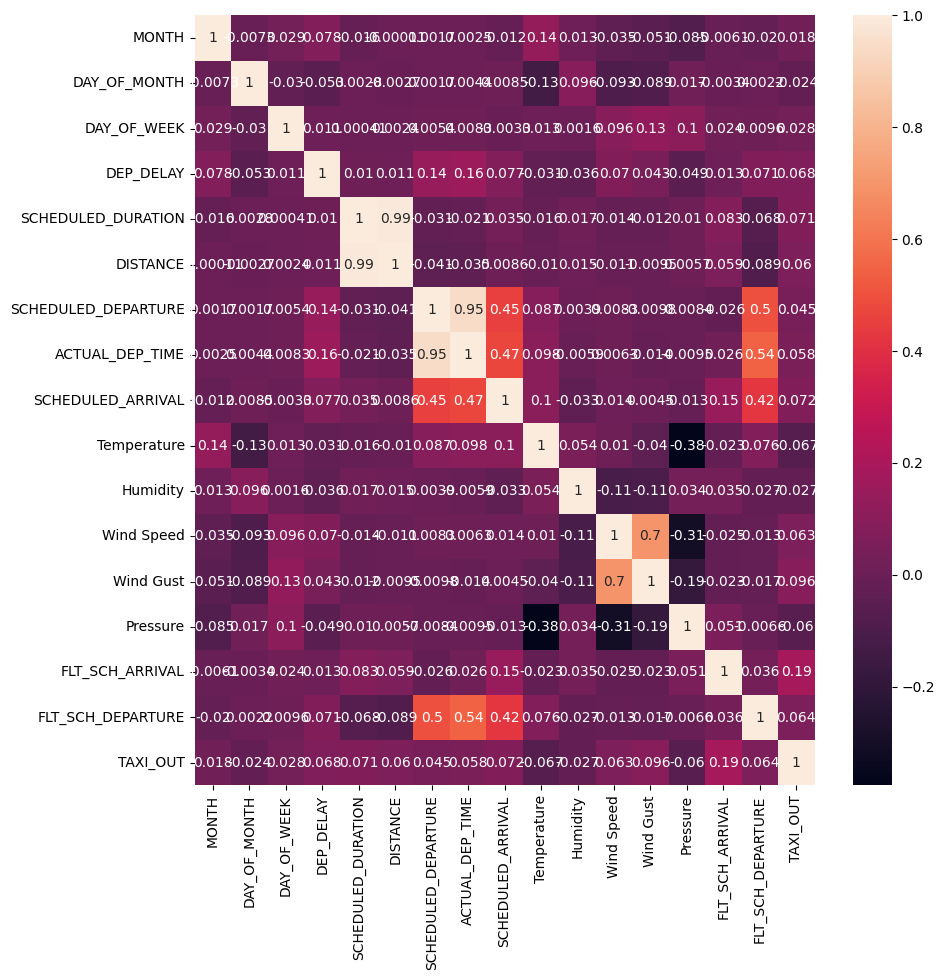

In [1328]:
## Showing correlation using heatmap
plt.figure(figsize=(10,10))
sns.heatmap(corr_mat, annot=True)

In [1329]:
#data.hist(bins=50, figsize=(20, 15))
#plt.show

In [1330]:
# Droped object
data.drop(["CARRIER_CODE"], axis=1, inplace=True)
data.drop(["FLIGHT_NO"], axis=1, inplace=True)
data.drop(["DEST"], axis=1, inplace=True)
data.drop(["Wind"], axis=1, inplace=True)
data.drop(["Condition"], axis=1, inplace=True)
data.drop(["Dew Point"], axis=1, inplace=True)  # Dew Point is related to Humidity so it can be dropped.


# Since DISTANCE and DURATION represent similar things and are highly correlated, we can drop DURATION
data.drop(["SCHEDULED_DURATION"], axis=1, inplace=True)

# Since DEP_DELAY is important and enough for us we can drop SCHEDULED_DEPARTURE, ACTUAL_DEP_TIME, and SCHEDULED_ARRIVAL.
data.drop(["SCHEDULED_DEPARTURE"], axis=1, inplace=True)
data.drop(["ACTUAL_DEP_TIME"], axis=1, inplace=True)
data.drop(["SCHEDULED_ARRIVAL"], axis=1, inplace=True)

# Wind Gust and Wind Speed are highly correlated so one can be dropped.
data.drop(["Wind Gust"], axis=1, inplace=True)

# Wind Speed and Pressure are negatively correlated and they represent similar things. Thus, Pressure can be dropped.
data.drop(["Pressure"], axis=1, inplace=True)

In [1331]:
data.head()

,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,DEP_DELAY,DISTANCE,Temperature,Humidity,Wind Speed,FLT_SCH_ARRIVAL,FLT_SCH_DEPARTURE,TAXI_OUT
0,11,1,5,0,636,48,58,25,9,17,14
1,11,1,5,0,2475,48,58,25,9,17,15
2,11,1,5,1,1069,48,58,25,9,17,22
3,11,1,5,0,944,48,58,25,9,17,12
4,11,1,5,0,760,46,58,24,9,17,13


---

Regression for TAXI_OUT

In [1332]:
## Splitting the dependent and independent variable
x = data.iloc[:, :10].values
y = data.iloc[:, 10].values

In [1333]:
X_train, X_test, y_train, y_test = train_test_split(x ,y, test_size=2, random_state=32)


In [1334]:
## standardiazation (feature scaling)
## input data is transformed to have a mean of zero and variance of 1
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [1335]:
## Linear regression
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

LinearRegression()

In [1336]:
## Prediction
y_pred = lin_reg.predict(X_test)

In [1337]:
## Create a dataframe that will show actual value and the predicted value
result = {"Actual_Value":y_test, "Predicted_Value":y_pred}
result_df = pd.DataFrame(result)
result_df

,Actual_Value,Predicted_Value
0,21,22.103107
1,19,22.099006


In [1338]:
## Metric in regression (Regressionda doğruluğu kontrol etmek için kullanıyoruz)
# RSQUARED 0-- not good, 1-- good
# MEAN ABSOLUTE ERROR -- average absolute value between actual values and predicted values
# MEAN SQUARED ERROR -- measure the average squraed differences between the actual and the predicted values
# ROOT MEAN SQUARED ERROR -- is just the square root of the mean square error
""" Rsquared dışında hepsi 0'a yakın olmalı. 0'dan uzaklaşması doğruluktan uzaklaşması demek."""

meanAbError = metrics.mean_absolute_error(y_test, y_pred)
meanSqError = metrics.mean_squared_error(y_test, y_pred)
rootMeanSqrr = np.sqrt(metrics.mean_squared_error(y_test, y_pred))

print('R squared:{:.2f}'.format(lin_reg.score(X_test, y_test)))
print('Mean Absolute Error:', meanAbError)
print('Mean Square Error:', meanSqError)
print('Root Mean Square Error:', rootMeanSqrr)

R squared:-4.41
Mean Absolute Error: 2.101056514088622
Mean Square Error: 5.410342028362033
Root Mean Square Error: 2.3260141934996943


Ridge and Lasso Models 

In [1339]:
## grouping the dependent and independent variable
x = data.iloc[:-1, 1:10]
y = data.iloc[:-1, 10]

In [1340]:
## define our model
model_lasso = Lasso(alpha=0.10)
model_ridge = Ridge(alpha=0.10)

## fit model
model_lasso.fit(x,y)
model_ridge.fit(x,y)

Ridge(alpha=0.1)

In [1341]:
## define new data to predict
new = data.iloc[-1, 1:10]

In [1342]:
prediction_lasso = model_lasso.predict([new])
prediction_lasso

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but Lasso was fitted with feature names
  warnings.warn(


array([18.30915126])

In [1343]:
prediction_ridge = model_ridge.predict([new])
prediction_ridge

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but Ridge was fitted with feature names
  warnings.warn(


array([18.20164021])

In [1344]:
## tuning alpha 
## DEFINE MODEL EVALUATION METHOD
cv = RepeatedKFold(n_splits=2, n_repeats=1, random_state=1)
## define model
model = RidgeCV(alphas=np.arange(0.5, 1, 0.01), cv=cv, scoring='neg_mean_absolute_error')

## fit model
model.fit(x,y)

## summarize chosen configuration
print('alpha: %f' % model.alpha_)

alpha: 0.500000


---

How does the DEP_DELAY vary with Wind Speed?

In [1345]:
# Specify the X and y variables
X = data['Wind Speed'].values.reshape(-1, 1)
y = data['DEP_DELAY'].values.reshape(-1, 1)

#Train, test and split my data, test size is 30%, 70% is for training
X_train, X_test, Y_train, Y_test = train_test_split (X,y, test_size=0.3, random_state=32)

print("X_Train size is:",X_train.shape)
print("X_Test size is:",X_test.shape)
print("Y_train size is:",Y_train.shape)
print("Y_Test size is:",Y_test.shape)

X_Train size is: (20172, 1)
X_Test size is: (8646, 1)
Y_train size is: (20172, 1)
Y_Test size is: (8646, 1)


In [1346]:
# create a linear regression object
linear_regressor = LinearRegression()
linear_regressor.fit(X_train, Y_train)

LinearRegression()

In [1347]:
# make the predictions based on the model
Y_pred = linear_regressor.predict(X_test)

##Create a data frame fr predictions 
pd.DataFrame({'Actual': Y_test.reshape(-1), 'Predicted': Y_pred.reshape(-1)})

,Actual,Predicted
0,0,0.274299
1,0,0.304415
2,1,0.269997
3,1,0.282904
4,1,0.269997
...,...,...
8641,0,0.252788
8642,0,0.317321
8643,1,0.287206
8644,0,0.295810


In [1348]:
""" Except for Rsquared, all must be close to 0. Any further away from 0 means far from accuracy. """

print('MAE:', metrics.mean_absolute_error(Y_test.reshape(-1), Y_pred.reshape(-1)))
print('MSE:', metrics.mean_squared_error(Y_test.reshape(-1), Y_pred.reshape(-1)))
print('RMSE:', np.sqrt(metrics.mean_squared_error(Y_test.reshape(-1), Y_pred.reshape(-1))))
print('R2:', metrics.r2_score(Y_test.reshape(-1), Y_pred.reshape(-1)))

MAE: 0.39215296938970723
MSE: 0.1950748125916064
RMSE: 0.44167274377258825
R2: 0.007475935107007281


---

How does the DEP_DELAY vary with Temperature?

In [1349]:
# Specify the X and y variables
X = data['Temperature'].values.reshape(-1, 1)
y = data['DEP_DELAY'].values.reshape(-1, 1)

#Train, test and split my data, test size is 30%, 70% is for training
X_train, X_test, Y_train, Y_test = train_test_split (X,y, test_size=0.3, random_state=32)

print("X_Train size is:",X_train.shape)
print("X_Test size is:",X_test.shape)
print("Y_train size is:",Y_train.shape)
print("Y_Test size is:",Y_test.shape)

X_Train size is: (20172, 1)
X_Test size is: (8646, 1)
Y_train size is: (20172, 1)
Y_Test size is: (8646, 1)


In [1350]:
# create a linear regression object
linear_regressor = LinearRegression()
linear_regressor.fit(X_train, Y_train)

# make the predictions based on the model
Y_pred = linear_regressor.predict(X_test)

##Create a data frame fr predictions 
pd.DataFrame({'Actual': Y_test.reshape(-1), 'Predicted': Y_pred.reshape(-1)})

,Actual,Predicted
0,0,0.279144
1,0,0.274130
2,1,0.274130
3,1,0.262431
4,1,0.249061
...,...,...
8641,0,0.255746
8642,0,0.285829
8643,1,0.270788
8644,0,0.297528


In [1351]:
""" Except for Rsquared, all must be close to 0. Any further away from 0 means far from accuracy. """

print('MAE:', metrics.mean_absolute_error(Y_test.reshape(-1), Y_pred.reshape(-1)))
print('MSE:', metrics.mean_squared_error(Y_test.reshape(-1), Y_pred.reshape(-1)))
print('RMSE:', np.sqrt(metrics.mean_squared_error(Y_test.reshape(-1), Y_pred.reshape(-1))))
print('R2:', metrics.r2_score(Y_test.reshape(-1), Y_pred.reshape(-1)))

MAE: 0.3940253051413295
MSE: 0.19633121922125363
RMSE: 0.4430927885006183
R2: 0.0010834449713043037


---

How does the TAXI_OUT vary with DEP_DELAY?

In [1352]:
# Specify the X and y variables
X = data['DEP_DELAY'].values.reshape(-1, 1)
y = data['TAXI_OUT'].values.reshape(-1, 1)

#Train, test and split my data, test size is 30%, 70% is for training
X_train, X_test, Y_train, Y_test = train_test_split (X,y, test_size=0.3, random_state=32)

print("X_Train size is:",X_train.shape)
print("X_Test size is:",X_test.shape)
print("Y_train size is:",Y_train.shape)
print("Y_Test size is:",Y_test.shape)

X_Train size is: (20172, 1)
X_Test size is: (8646, 1)
Y_train size is: (20172, 1)
Y_Test size is: (8646, 1)


In [1353]:
# create a linear regression object
linear_regressor = LinearRegression()
linear_regressor.fit(X_train, Y_train)

# make the predictions based on the model
Y_pred = linear_regressor.predict(X_test)

##Create a data frame fr predictions 
pd.DataFrame({'Actual': Y_test.reshape(-1), 'Predicted': Y_pred.reshape(-1)})

,Actual,Predicted
0,21,20.561015
1,19,20.561015
2,17,21.658514
3,19,21.658514
4,20,21.658514
...,...,...
8641,26,20.561015
8642,19,20.561015
8643,28,21.658514
8644,22,20.561015


In [1354]:
""" Except for Rsquared, all must be close to 0. Any further away from 0 means far from accuracy. """

print('MAE:', metrics.mean_absolute_error(Y_test.reshape(-1), Y_pred.reshape(-1)))
print('MSE:', metrics.mean_squared_error(Y_test.reshape(-1), Y_pred.reshape(-1)))
print('RMSE:', np.sqrt(metrics.mean_squared_error(Y_test.reshape(-1), Y_pred.reshape(-1))))
print('R2:', metrics.r2_score(Y_test.reshape(-1), Y_pred.reshape(-1)))

MAE: 5.5173070463296545
MSE: 46.96891989606072
RMSE: 6.853387475990302
R2: 0.003343401381984634
